# Data Science Portfolio
Aqui você verá todos os meus projetos de Data Science divididos em grupos com as habilidades necessárias para obter os melhores Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Adige/main/image/Group.png" alt="capa">

---

# **Bem-Vindo(a)!** • Veja o que eu fiz de melhor com cientista de dados
**+ 18** Projetos 
#### [Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

Vamos explorar dados de crédito e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

#### **Análise Exploratória**

<ol type="1">
  <li>Carregamento dos dados e entendimento do contexto</li>
</ol>

- `Variáveis do Dataset`

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

### Vamos começar a análise

In [1]:
# Importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Carregando os dados

In [2]:
df = pd.read_csv('./data.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data.csv'

### Estrutura dos dados

In [ ]:
linhas, colunas = df.shape
print(f'Temos {linhas} linhas e {colunas} colunas.')

Temos 10127 linhas e 16 colunas.


In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

In [ ]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### Schema

 - Colunas e seus respectivos tipos de dados.

In [ ]:
def guida(data_frame):
    righe, qnt_colonne = data_frame.shape
    sequenza = list(range(qnt_colonne + 1))
    sequenza = sequenza[1:]

    colonne = data_frame.columns.to_list()
    types_list = [str(type(data_frame[col][0])).split("'")[1] for col in data_frame.columns]
    lista_categorie = [data_frame[col].nunique() for col in data_frame.columns]

    elementi_nulli = data_frame.isnull().sum()
    elementi_nulli = elementi_nulli.to_list()

    percentuale_dati_nulli = round((data_frame.isnull().sum() / righe) * 100)
    percentuale_dati_nulli = percentuale_dati_nulli.to_list()

    data = pd.DataFrame({'Nome': colonne, 
                         'Tipo': types_list, 
                         'qunt_categorie': lista_categorie,
                         'Dati nulli' : elementi_nulli,
                         'Dati nulli %' : percentuale_dati_nulli}, index=sequenza)
    
    # Intestazioni
    print('Teabella Esplorativa')
    print(f'In questi dati abbiamo {righe} righe e {qnt_colonne} colonne.')
    
    return data

guida(df)

Teabella Esplorativa
In questi dati abbiamo 10127 righe e 16 colonne.


,Nome,Tipo,qunt_categorie,Dati nulli,Dati nulli %
1,id,numpy.int64,10127,0,0.0
2,default,numpy.int64,2,0,0.0
3,idade,numpy.int64,45,0,0.0
4,sexo,str,2,0,0.0
5,dependentes,numpy.int64,6,0,0.0
6,escolaridade,str,6,0,0.0
7,estado_civil,str,4,0,0.0
8,salario_anual,str,6,0,0.0
9,tipo_cartao,str,4,0,0.0
10,meses_de_relacionamento,numpy.int64,44,0,0.0


 - Atributos **categóricos**.

In [ ]:
df_categoricos = df.select_dtypes('object')
df_categoricos

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao,limite_credito,valor_transacoes_12m
0,M,ensino medio,casado,$60K - $80K,blue,"12.691,51","1.144,90"
1,F,mestrado,solteiro,menos que $40K,blue,"8.256,96","1.291,45"
2,M,mestrado,casado,$80K - $120K,blue,"3.418,56","1.887,72"
3,F,ensino medio,na,menos que $40K,blue,"3.313,03","1.171,56"
4,M,sem educacao formal,casado,$60K - $80K,blue,"4.716,22","816,08"
...,...,...,...,...,...,...,...
10122,M,mestrado,solteiro,$40K - $60K,blue,"4.003,91","15.476,26"
10123,M,na,divorciado,$40K - $60K,blue,"4.277,04","8.764,88"
10124,F,ensino medio,casado,menos que $40K,blue,"5.409,16","10.291,78"
10125,M,mestrado,na,$40K - $60K,blue,"5.281,84","8.395,62"


c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='salario_anual', ylabel='count'>

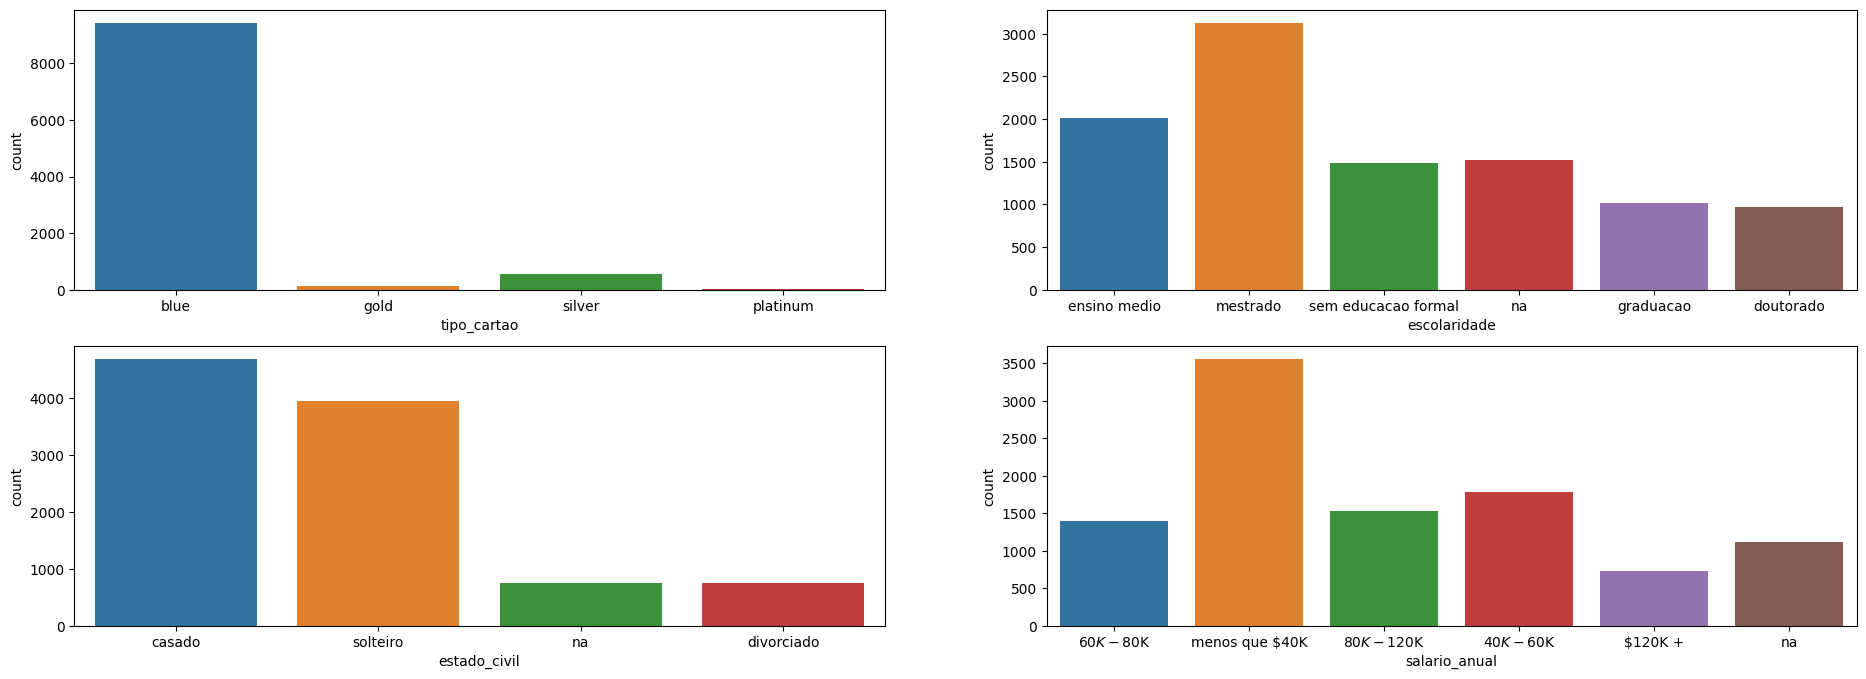

In [ ]:
plt.close('all')
plt.rc('figure', figsize=(23, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='tipo_cartao', data=df)
sns.countplot(ax = axes[0, 1], x='escolaridade', data=df)
sns.countplot(ax = axes[1, 0], x='estado_civil', data=df)
sns.countplot(ax = axes[1, 1], x='salario_anual', data=df)	


c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sexo', ylabel='count'>

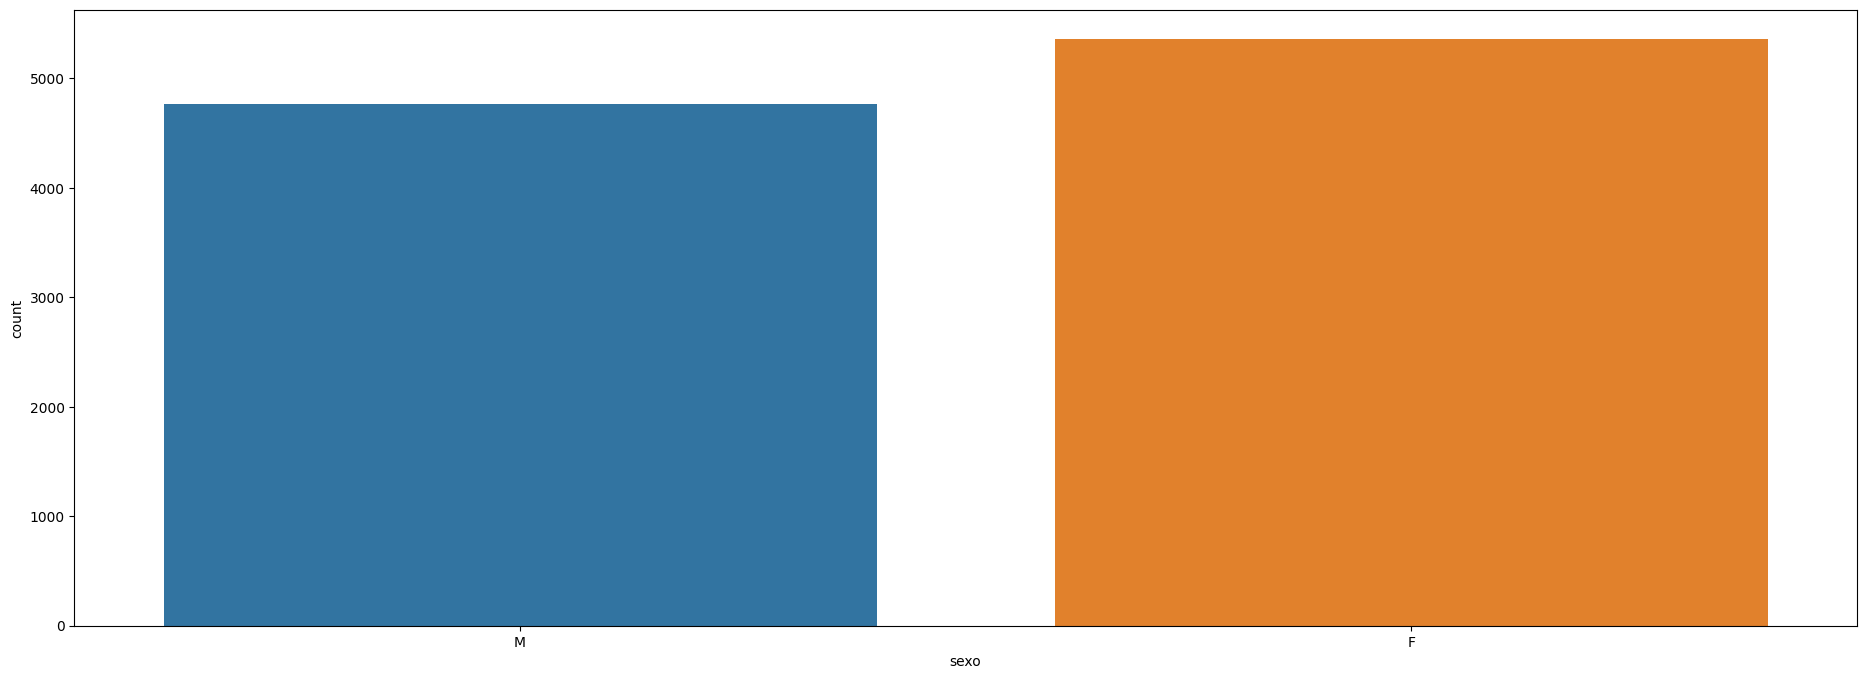

In [ ]:
sns.countplot(x='sexo', data=df)

In [ ]:
df.select_dtypes('object').describe().transpose() # freq / count = %

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [ ]:
df_categoricos = df.select_dtypes('number')
df_categoricos

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
0,768805383,0,45,3,39,5,3,1,42
1,818770008,0,49,5,44,6,2,1,33
2,713982108,0,51,3,36,4,0,1,20
3,769911858,0,40,4,34,3,1,4,20
4,709106358,0,40,3,21,5,0,1,28
...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,2,40,3,3,2,117
10123,710638233,1,41,2,25,4,3,2,69
10124,716506083,1,44,1,36,5,4,3,60
10125,717406983,1,30,2,36,4,3,3,62


In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### Tratamendo dos dados

In [ ]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%
